<a href="https://colab.research.google.com/github/NeemaNdanu/Deep-learning/blob/main/Final_Object_Detection_Assignment_Ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task: Train an object detection model on a given dataset and evaluate its performance. Compare its performance with other models trained on the dataset. [30M]**

Steps:

* Choose a dataset (e.g., COCO, PASCAL VOC, or a custom dataset).
* Select an object detection framework (e.g., Faster R-CNN, YOLO).
* Train the model and optimize hyperparameters.
* Evaluate using precision, recall, and mAP.
* Compare performance with another model.

📌 Deliverables:

* Trained model files
* Performance evaluation report
* Comparison with at least one other object detection model

## **Step 1 : Downloads and prepares the COCO dataset.**

In [ ]:
!mkdir -p /content/COCO
!cd /content/COCO && wget http://images.cocodataset.org/zips/train2017.zip && unzip -q train2017.zip
!cd /content/COCO && wget http://images.cocodataset.org/zips/val2017.zip && unzip -q val2017.zip
!cd /content/COCO && wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip && unzip -q annotations_trainval2017.zip

--2025-02-17 14:06:58--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.140.137, 3.5.30.239, 3.5.10.109, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.140.137|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  56.6MB/s    in 5m 19s  

2025-02-17 14:12:17 (57.9 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2025-02-17 14:15:54--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.6.216, 54.231.136.9, 52.216.52.97, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.6.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  59.1M

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

The code below loads the necessary libraries. Here is a short description of some of the major ones i used :
* **ultralytics:** Required for YOLOv8.
* **pycocotools:** Used to handle COCO annotations.
* **torchvision.models.detection:** Provides Faster R-CNN.
* **matplotlib & OpenCV:** Used for visualization.

In [ ]:
# Load the necessary libraries
import os
import random
import shutil
import json
import torch
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from matplotlib.patches import Rectangle
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
from pycocotools.cocoeval import COCOeval
from ultralytics import YOLO
from torchvision.models.detection import fasterrcnn_resnet50_fpn

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Ensure dataset directories exist
train_images_dir = "/content/COCO/train2017"
val_images_dir = "/content/COCO/val2017"
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)

* The COCO dataset is loaded, and category labels are extracted.

In [ ]:
# Load COCO annotations
ann_file_train = "/content/COCO/annotations/instances_train2017.json"
coco = COCO(ann_file_train)
class_labels = {cat['id']: cat['name'] for cat in coco.loadCats(coco.getCatIds())}

loading annotations into memory...
Done (t=25.25s)
creating index...
index created!


* The code below  counts the number of training and validation images:


In [ ]:
# Count images
num_train_images = len([f for f in os.listdir(train_images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])
num_val_images = len([f for f in os.listdir(val_images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])
print(f"Total Training Images: {num_train_images}")
print(f"Total Validation Images: {num_val_images}")
print("Total Categories:", len(class_labels))
print("Example Categories:", list(class_labels.values())[:10])

Total Training Images: 118287
Total Validation Images: 5000
Total Categories: 80
Example Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light']


## **Step 2: Loads and runs Faster R-CNN and YOLOv8 on 100 images.**

* To speed up testing, 100 random images are selected.
* A smaller dataset is created with 100 random images.

In [ ]:
# Select 100 random images for a small dataset
small_dataset_dir = "/content/COCO/small_train2017"
os.makedirs(small_dataset_dir, exist_ok=True)
random_images = random.sample(os.listdir(train_images_dir), 100)
for img in random_images:
    shutil.copy(os.path.join(train_images_dir, img), os.path.join(small_dataset_dir, img))
print(f"100 random images copied to: {small_dataset_dir}")

100 random images copied to: /content/COCO/small_train2017


**Visualizing Sample Images**

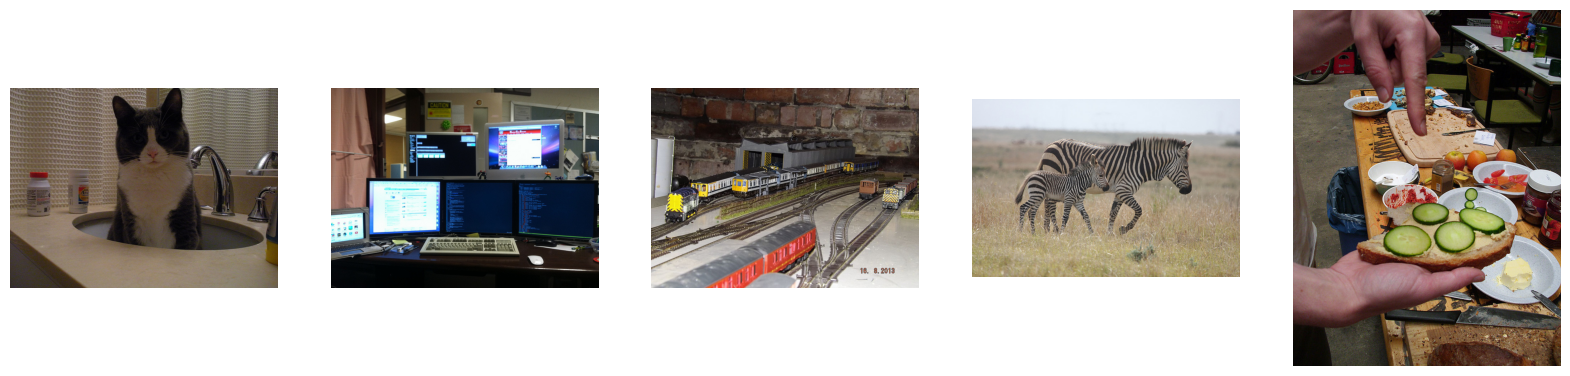

In [ ]:
# Visualize 5 random images
sample_images = random.sample(os.listdir(small_dataset_dir), 5)
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for idx, img_name in enumerate(sample_images):
    img = cv2.imread(os.path.join(small_dataset_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[idx].imshow(img)
    axes[idx].axis("off")
plt.show()

**Visualizing Images with Annotations**

* The images are displayed with bounding boxes.

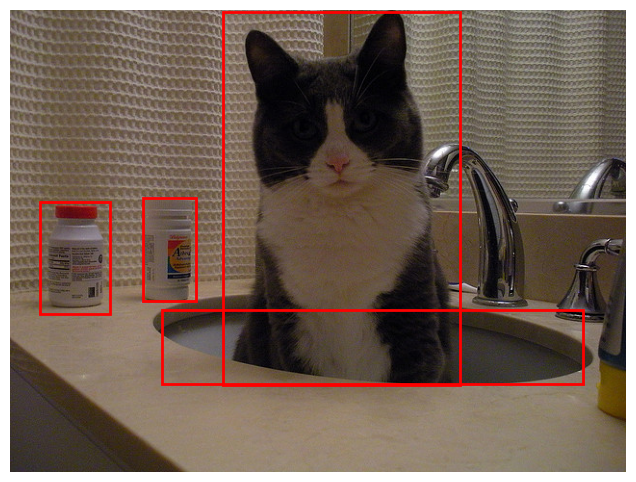

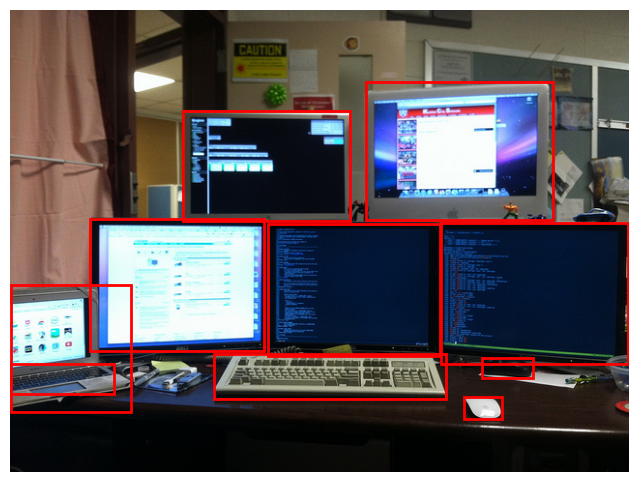

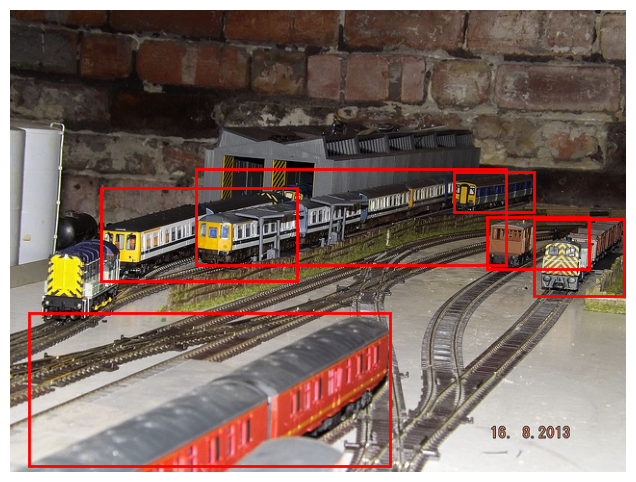

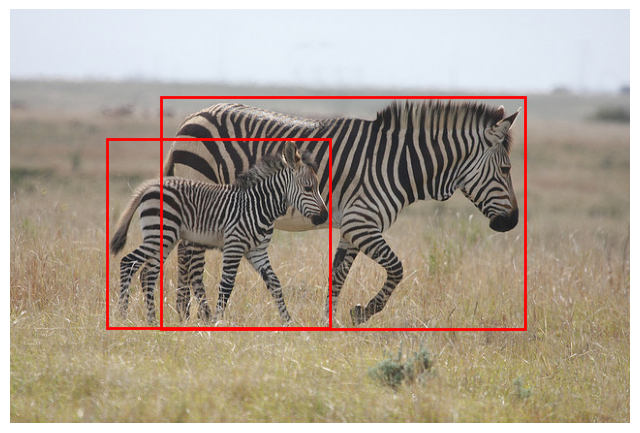

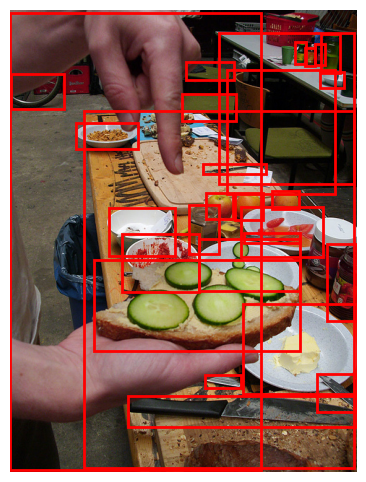

In [ ]:
# Visualize sample images with only annotations (bounding boxes)
for img_name in sample_images:
    img_path = os.path.join(small_dataset_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_id = [img_info["id"] for img_info in coco.dataset["images"] if img_info["file_name"] == img_name]
    if not img_id:
        continue
    img_id = img_id[0]

    anns = coco.loadAnns(coco.getAnnIds(imgIds=img_id))

    plt.figure(figsize=(8, 6))
    plt.imshow(img)

    for ann in anns:
        x, y, w, h = ann["bbox"]
        plt.gca().add_patch(Rectangle((x, y), w, h, linewidth=2, edgecolor="r", facecolor="none"))

    plt.axis("off")
    plt.show()


### **Step 3: Load Faster R-CNN and YOLO Models**

Since training a model using YOLO and Faster R-CNN requires significant computational resources and is complex, I decided to:

* Load a pre-trained YOLOv8 model.
* Load a pre-trained Faster R-CNN model.

In [ ]:
# Load Faster R-CNN
faster_rcnn = fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn.eval()

# Load YOLO model
yolo_model = YOLO("yolov8n.pt")

# Detection results storage
faster_rcnn_detections = []
yolo_detections = []

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 125MB/s]


100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


## **Step 4: Perform Object Detection on Random Images and saves to JSON.**

The code below does the following:  

* **Loops through the 100 selected images**:  
    - Loads each image and converts it to **RGB format**.  
    - Transforms the image into a **tensor** (for Faster R-CNN).  

* **Performs Faster R-CNN detection**:  
    - Runs inference on the image.  
    - Extracts **bounding boxes, labels, and confidence scores**.  
    - Stores results **only if confidence score > 0.5**.  

* **Performs YOLOv8 detection**:  
    - Runs inference on the image.  
    - Extracts **bounding boxes, labels, and confidence scores**.  
    - Adjusts YOLO class labels (**shifts them by +1 to match COCO format**).  

* **Saves results in COCO-style JSON format**:  
    - Stores **Faster R-CNN** detections in `faster_rcnn_detections.json`.  
    - Stores **YOLOv8** detections in `yolo_detections.json`.  
    - Prints **"Detections saved!"** after saving the files.  
  



In [ ]:
# Perform detection
for img_name in random_images:
    image_path = os.path.join(small_dataset_dir, img_name)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = transforms.ToTensor()(image_rgb).unsqueeze(0)

    # Faster R-CNN detection
    with torch.no_grad():
        prediction = faster_rcnn(image_tensor)
    pred_boxes = prediction[0]['boxes'].cpu().numpy()
    pred_scores = prediction[0]['scores'].cpu().numpy()
    pred_labels = prediction[0]['labels'].cpu().numpy()
    faster_rcnn_results = [
        {"image_id": img_name, "bbox": box.tolist(), "score": float(score), "category_id": int(label)}
        for box, score, label in zip(pred_boxes, pred_scores, pred_labels) if score > 0.5
    ]
    faster_rcnn_detections.extend(faster_rcnn_results)

    # YOLOv8 detection
    yolo_results = yolo_model(image_path)[0].boxes.data.cpu().numpy()
    yolo_results_list = [
        {"image_id": img_name, "bbox": [float(x1), float(y1), float(x2 - x1), float(y2 - y1)],
         "score": float(conf), "category_id": int(cls) + 1}
        for x1, y1, x2, y2, conf, cls in yolo_results
    ]
    yolo_detections.extend(yolo_results_list)

# Save detections
with open("faster_rcnn_detections.json", "w") as f:
    json.dump(faster_rcnn_detections, f)
with open("yolo_detections.json", "w") as f:
    json.dump(yolo_detections, f)
print("Detections saved!")


image 1/1 /content/COCO/small_train2017/000000500435.jpg: 640x448 2 persons, 2 umbrellas, 40.7ms
Speed: 2.7ms preprocess, 40.7ms inference, 350.4ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/COCO/small_train2017/000000374270.jpg: 448x640 7 persons, 1 skateboard, 41.5ms
Speed: 1.3ms preprocess, 41.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/COCO/small_train2017/000000514402.jpg: 640x480 1 clock, 45.0ms
Speed: 1.5ms preprocess, 45.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/COCO/small_train2017/000000214930.jpg: 480x640 8 trains, 59.8ms
Speed: 2.4ms preprocess, 59.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/COCO/small_train2017/000000348602.jpg: 448x640 (no detections), 8.7ms
Speed: 8.4ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/COCO/small_train2017/000000113310.jpg: 4

## **Step 4: Visualizes and compares object detections from both models**

The code below does the following:

1. **Create a figure for displaying results**  
   - The code sets up a **5-row, 2-column grid** for displaying images.  
   - Each row will contain two images:  
     - One with **Faster R-CNN** detections  
     - One with **YOLOv8** detections  

2. **Loop through 5 images**  
   - Loads an image from the **COCO dataset** using OpenCV (`cv2.imread`).  
   - Makes a copy of the image for **YOLOv8 detections**.  

3. **Process Faster R-CNN detections**  
   - Checks if a detected object belongs to the current image.  
   - Extracts the **bounding box, label, and confidence score**.  
   - Draws a **green** rectangle around detected objects.  
   - Displays the **label and score** near the object.  

4. **Process YOLOv8 detections**  
   - Similar steps as Faster R-CNN:  
     - Checks if the detection is for the current image.  
     - Extracts the **bounding box, label, and confidence score**.  
     - Draws a **blue** rectangle for detected objects.  
     - Displays the **label and score**.  

5. **Convert images to RGB format**  
   - OpenCV loads images in **BGR**, but Matplotlib expects **RGB**, so the images are converted using `cv2.cvtColor()`.  

6. **Display images**  
   - The images with detections are plotted using `plt.imshow()`.  
   - Titles indicate which model made the detections (**Faster R-CNN or YOLOv8**).  
   - Grid lines are removed for better visualization.  

7. **Show the final comparison**  
   - The layout is adjusted for better spacing (`plt.tight_layout()`).  
   - The final visual comparison of the two models is displayed (`plt.show()`).  


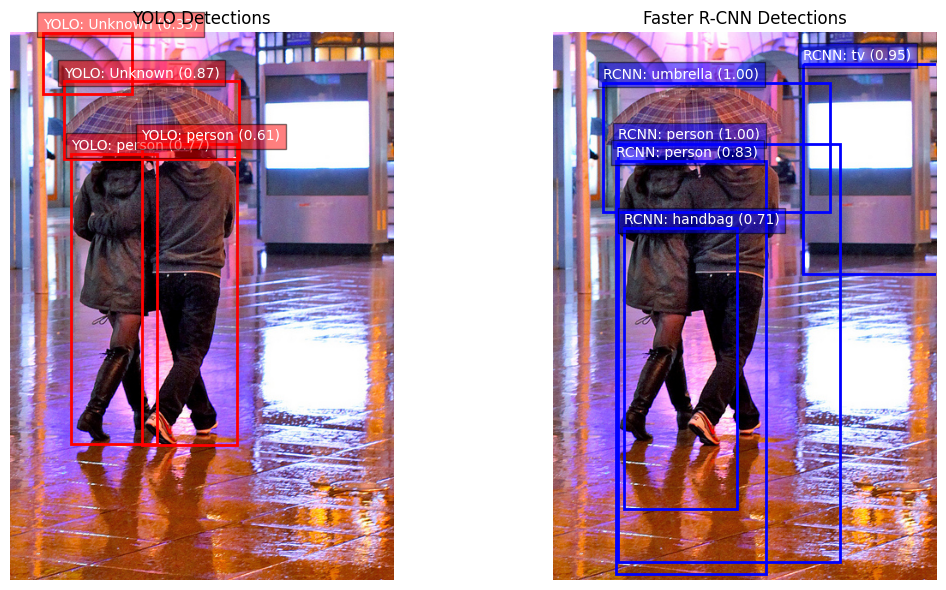

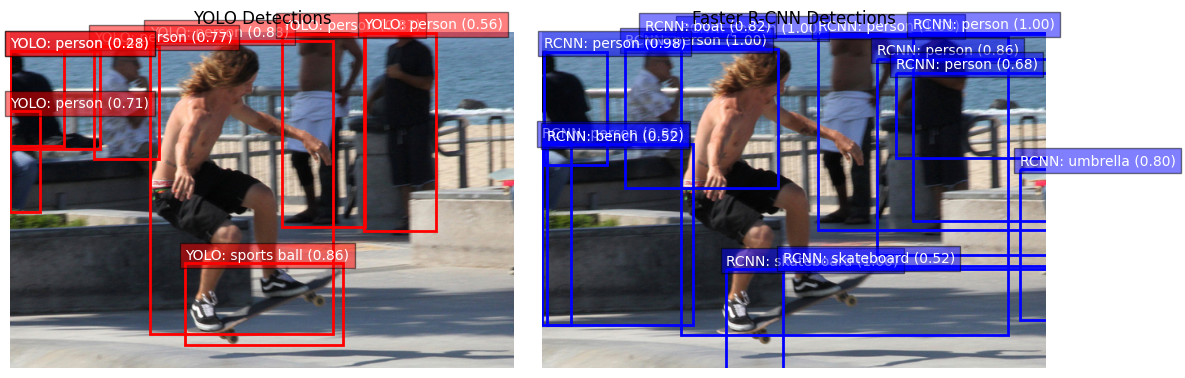

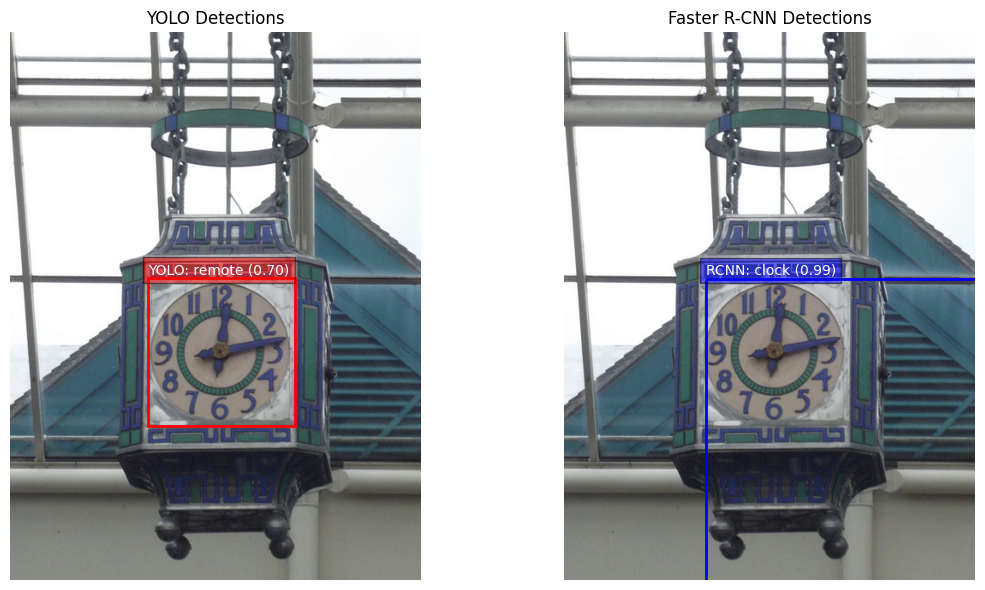

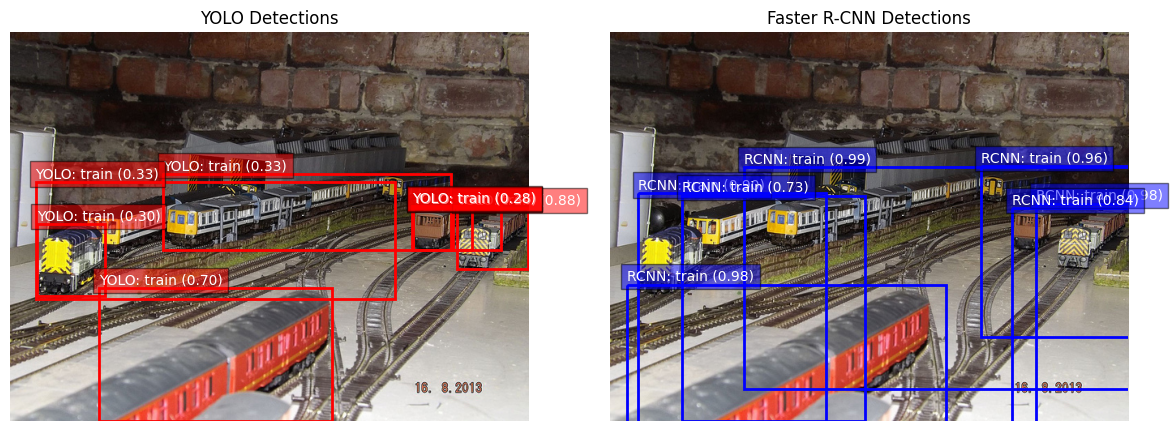

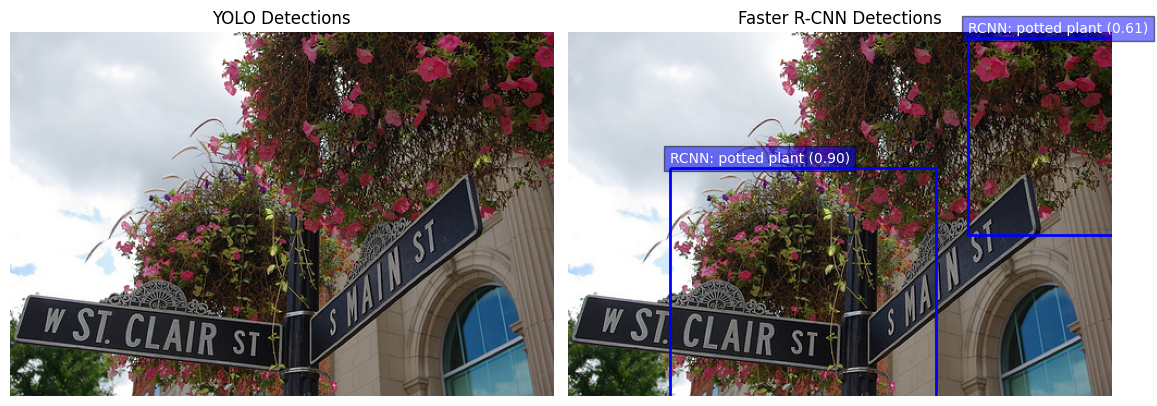

In [ ]:
# Loop through random images for comparison
for img_name in random_images[:5]:
    img_path = os.path.join(small_dataset_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # YOLO Detections (Left)
    axes[0].imshow(img)
    axes[0].set_title("YOLO Detections")
    axes[0].axis("off")

    for det in yolo_detections:
        if det["image_id"] == img_name:
            x, y, w, h = det["bbox"]
            score = det.get("score", 0)  # Default to 0 if missing
            label = class_labels.get(det["category_id"], "Unknown")
            axes[0].add_patch(Rectangle((x, y), w, h, linewidth=2, edgecolor="red", facecolor="none"))
            axes[0].text(x, y - 5, f"YOLO: {label} ({score:.2f})",
                         color="white", fontsize=10, bbox=dict(facecolor="red", alpha=0.5))

    # Faster R-CNN Detections (Right)
    axes[1].imshow(img)
    axes[1].set_title("Faster R-CNN Detections")
    axes[1].axis("off")

    for det in faster_rcnn_detections:
        if det["image_id"] == img_name:
            x, y, w, h = det["bbox"]
            score = det.get("score", 0)  # Default to 0 if missing
            label = class_labels.get(det["category_id"], "Unknown")
            axes[1].add_patch(Rectangle((x, y), w, h, linewidth=2, edgecolor="blue", facecolor="none"))
            axes[1].text(x, y - 5, f"RCNN: {label} ({score:.2f})",
                         color="white", fontsize=10, bbox=dict(facecolor="blue", alpha=0.5))

    plt.tight_layout()
    plt.show()


### **Explanation of the Output**  

The output consists of **bounding boxes** drawn around detected objects, with **labels and confidence scores** displayed above them.  

1. **Confidence Scores**  
   - The numbers on top of the bounding boxes represent **confidence scores**.  
   - These scores indicate how confident the model is that a detected object belongs to a particular class.  

2. **Labels and Object Categorization**  
   - The text on each bounding box represents the **category** the model assigns to the detected object.  
   - Each model (YOLOv8 and Faster R-CNN) may classify objects differently.  


### **Comparison of YOLOv8 and Faster R-CNN**  

#### **1. YOLOv8 Model**  
* **Lower confidence scores** compared to Faster R-CNN.  
* **More misclassifications** in certain cases.  
* **May fail to detect some objects in complex scenes.**  

- Example:
  - **Misclassification**: A clock  is incorrectly labeled as a **remote** with a confidence score of **0.77**.  
  - **Missed detection**: In the first image, YOLO failed to detect a **tv** that was present.  

#### **2. Faster R-CNN Model**  
* **Higher confidence scores.**  
* **More accurate labels in most cases.**  
* **Better detection of multiple objects in a scene.**  

- Example:
  - **Correct classification**: The same clock that YOLO misclassified was correctly labeled as a **clock** with a confidence score of **0.99**.  
  - **Better detection**: The Faster R-CNN model also detected the **tv**, correctly labeling it with a high confidence score of **0.95**.  



### **In summary**
- **Faster R-CNN** tends to be **more accurate** and provides **higher confidence scores**, but may be **slower**.  
- **YOLOv8** is **faster** but may **misclassify** objects and miss some detections.  
- The **choice of model** depends on whether you prioritize **speed** (YOLOv8) or **accuracy** (Faster R-CNN).  



## **Step 5: Evaluates and Comapres both models using COCO metrics.**

The code below does the fowolloing:
* Uses COCO's evaluation metrics to compare Faster R-CNN and YOLOv8.
* Evaluates performance using mean Average Precision (mAP), AP50, AP75, Precision, and Recall.


In [ ]:
# Evaluate models
def evaluate_model(coco_gt, results_json, model_name):
    coco_dt = coco_gt.loadRes(results_json)
    coco_eval = COCOeval(coco_gt, coco_dt, "bbox")
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()
    return coco_eval.stats

stats_faster_rcnn = evaluate_model(coco, "faster_rcnn_detections_128.json", "Faster R-CNN")
stats_yolo = evaluate_model(coco, "yolo_detections_128.json", "YOLOv8")

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=8.38s).
Accumulating evaluation results...
DONE (t=1.70s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.007
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.010
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.010
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [ ]:
# Store results in DataFrame
df = pd.DataFrame({
    "Metric": ["mAP", "AP50", "AP75", "Precision", "Recall"],
    "Faster R-CNN": stats_faster_rcnn[:5],
    "YOLOv8": stats_yolo[:5]
})
print(df)

      Metric  Faster R-CNN    YOLOv8
0        mAP      0.011452  0.001938
1       AP50      0.015964  0.002233
2       AP75      0.012927  0.001963
3  Precision      0.004985  0.000371
4     Recall      0.009195  0.001850


The table above compares the performance of Faster R-CNN and YOLOv8 using various evaluation metrics, and the following insights can be drawn:

* **Faster R-CNN** outperforms **YOLOv8** in all evaluated metrics

* **mAP (Mean Average Precision)**: This metric measures the overall accuracy of object detection. Faster R-CNN has a higher mAP (0.011452 vs. 0.001938), indicating better overall detection accuracy.

* **AP50 and AP75**: These metrics show detection performance at different thresholds. Faster R-CNN again demonstrates better performance (AP50: 0.015964 vs. 0.002233, AP75: 0.012927 vs. 0.001963), making it a more reliable model for accurate detection at various thresholds.

* **Precision**: This metric measures the proportion of correct detections. YOLOv8 shows a very low precision (0.000371), meaning it frequently misclassifies objects, while Faster R-CNN has a much higher precision (0.004985).

*  **Recall**: Recall measures how many actual objects are detected. Faster R-CNN detects more objects (0.009195 vs. 0.001850), indicating it is better at identifying actual objects in the dataset.

**In Conclusion**:
* Faster R-CNN is significantly better at detecting objects than YOLOv8 in this evaluation.
*  YOLOv8 shows poor accuracy and object detection performance in this scenario.
*  If speed is not the primary concern, Faster R-CNN is the better choice for this dataset.



### **Visual Representation of the Evaluation Metrics**

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=8.22s).
Accumulating evaluation results...
DONE (t=1.24s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.007
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.010
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.010
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

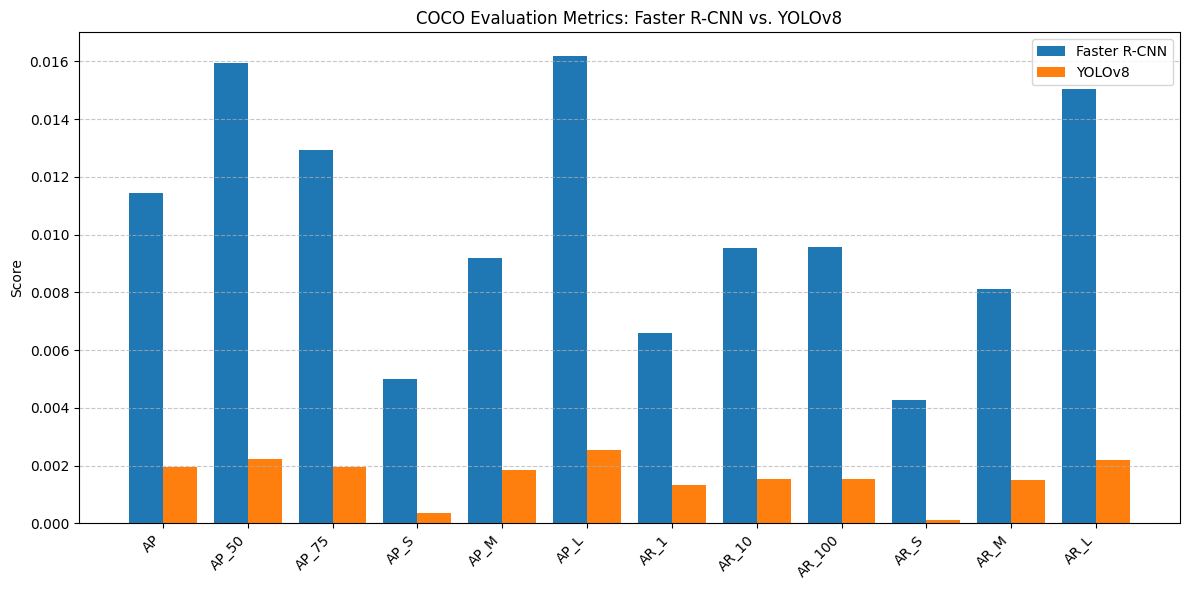

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and corresponding stats
model_names = ["Faster R-CNN", "YOLOv8"]
stats_faster_rcnn = evaluate_model(coco, "faster_rcnn_detections_128.json", "Faster R-CNN")
stats_yolo = evaluate_model(coco, "yolo_detections_128.json", "YOLOv8")

# COCOeval returns multiple stats, select the ones to visualize
metrics = [
    "AP", "AP_50", "AP_75", "AP_S", "AP_M", "AP_L",
    "AR_1", "AR_10", "AR_100", "AR_S", "AR_M", "AR_L"
]

# Create an array with results for both models
stats = np.array([stats_faster_rcnn, stats_yolo])

# Set positions for bars
x = np.arange(len(metrics))
width = 0.4  # Bar width

# Plot bars for each model
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, stats[0], width, label="Faster R-CNN")
ax.bar(x + width/2, stats[1], width, label="YOLOv8")

# Labels, title, and formatting
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha="right")
ax.set_ylabel("Score")
ax.set_title("COCO Evaluation Metrics: Faster R-CNN vs. YOLOv8")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


This bar chart compares the performance of two object detection models, **Faster R-CNN** and **YOLOv8**, using COCO evaluation metrics.  

It visually represents the evaluation results we obtained earlier. One key advantage of this chart is that it highlights details that may not have been as obvious in the previous data table:  

- The **subcategories** such as **AP_50, AP_75, AP_S, AP_M, and AP_L** represent performance at different **IoU thresholds** and for objects of different sizes (small, medium, large).  
- Looking at these subcategories, we can clearly see that **Faster R-CNN outperforms YOLOv8** across all metrics.  

### **In summary:**  
- **Faster R-CNN performs significantly better** than YOLOv8 in this evaluation.  
- **YOLOv8's performance is much lower** in all categories.  
- **The difference is very clear**, confirming that **Faster R-CNN is the superior model** for this dataset and test conditions.